# Bike Sharing Problem


## Contents
1. [Problem Statement](#problem)
2. [Goal](#goal)
3. [Data Reading and Understanding](#data-steps)
    * [Import Required Libraries and Configure Default Settings](#import-required-libraries-and-configure-default-settings)
    * [Read the dataset and understand](#read-the-dataset-and-understand)
4. [Data Cleaning and Manipulation](#data-cleaning-and-manipulation)
   * [Drop Columns that are not Useful for this Analysis](#drop-columns-that-are-not-useful-for-this-analysis)
   * [Check Outliers](#check-outliers)
   * [Convert values to Categorial Types](#convert-values-to-categorial-types)
   * [Create Dummy Variables](#create-dummy-variables)
5. [Exploratory Data Analysis (EDA)](#eda)
   * [Visualising Numeric Variables](#univariate-analysis)
   * [Visualising Categorial Variables](#bivariate-analysis)
   * [Correlation Matrix](#correlation-matrix)
6. [Model Building](#model-building)
   * [Train-Test Split](#train-test-split)
   * [Rescaling the data](#rescaling)
   * [Automated Approach - Recursive Feature Elimination (RFE)](#automated-approach-recursive-feature-elimination-rfe)
   * [Manual Elimination](#manual-elimination)
      * [Manual 1](#model-1)
      * [Manual 2](#model-2)
      * [Manual 3](#model-3)
      * [Manual 4](#model-4)
      * [Manual 5](#model-5)
      * [Manual 6](#model-6)
      * [Manual 7](#model-7)
7. [Model Interpretation](#model-interpretation)
   * [Hypothesis Testing](#hypothesis-testing)
   * [F Statistics](#f-statistics)
   * [Equation](#equation)
8. [Model Evaluation](#model-evaluation)
   * [Residual Analysis](#residual-analysis)
   * [Linearity Check](#linearity-check)
   * [Predictions and Evaluation](#predictions-and-evaluation)
   * [R-Squared value on Test Set](#r-squared-value-on-test-set)
9. [Final Report](#final-report)
    
    



## Problem Statement:
BoomBikes, a US-based bike-sharing service, has seen a significant decline in revenue due to the COVID-19 pandemic. As they plan for recovery, the company seeks to understand the factors driving bike demand to prepare for post-pandemic conditions. They aim to identify key variables affecting demand and how these can be leveraged to gain a competitive edge and boost profitability.

To support their strategy, BoomBikes has collected daily data on bike demand, considering meteorological conditions and consumer behavior. They’ve hired a consulting firm to analyze this data to determine which factors significantly predict bike usage. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands

The insights will guide their operations, enabling them to meet customer needs and thrive in the market as the economy stabilizes. 


## Business Goal:

Our goal is to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Data Reading and Understanding

### 1.1: Import Required Libraries and Configure Default Settings

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### 1.2: Read the dataset and understand

In [2]:
# read the data from dataset
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# describe the data set 
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:
# check the shape of the dataset
bike.shape

(730, 16)

In [5]:
# check for missing values
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<div class="alert alert-block alert-info">

**Insights:** 

1. Bike Sharing Dataset has 730 rows and 16 columns
2. There are no null/missing values in any of the column
3. All values are either integer or float data type except one column which of date type
</div>

## Step 2: Data Cleaning and Preparation

#### 2.1 Drop columns that are not useful for this analysis

Following columns can be dropped: 
- `instant` column can be dropped as it is just a record index and it has no use in anlysis.
- `dteday` can be removed as dataset has date features like `mnth` and `year` and `weekday` already in other columns and for this analysis we will not consider date wise trend in demand for bikes.
- `casual` and `registered` can be removed as Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.

In [6]:
# select required columns
bike_sharing = bike[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


#### 2.2: Check for Outliers

In [8]:
bike_sharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

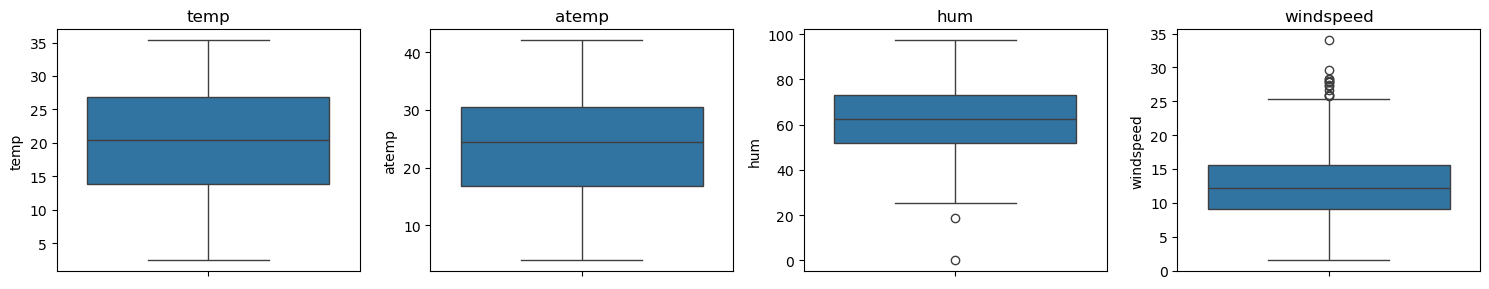

In [9]:
# Draw box plot for independent variables with continuous values
columns = ['temp', 'atemp', 'hum', 'windspeed']

plt.figure(figsize=(15, 3))

for i in range(len(columns)):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=bike_sharing[columns[i]])
    plt.title(columns[i])
    
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">

**Insights:** 

1. There are no outliers in the dataset to consider.

</div>

### 2.3: Convert values to Categorial Types

In [10]:
bike_sharing.season.replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}, inplace=True)
bike_sharing.weathersit.replace({1: 'clear', 2: 'mist', 3: 'light_snow', 4: 'heavy_rain'}, inplace=True)
bike_sharing.mnth.replace({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'}, inplace=True)
bike_sharing.weekday.replace({0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'}, inplace=True)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### 2.4: Create Dummy Variables

In [11]:
bike_sharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [12]:
bike_sharing = pd.get_dummies(data=bike_sharing, columns=['season', 'mnth', 'weekday'], drop_first=True, dtype=int)

# In weathersit first column was not dropped so as to not lose the info about heavy rain weather situation.
bike_sharing = pd.get_dummies(data=bike_sharing, columns=['weathersit'], dtype=int)
bike_sharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_clear', 'weathersit_light_snow',
       'weathersit_mist'],
      dtype='object')

In [13]:
bike_sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_light_snow,weathersit_mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,1,0,0


In [14]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   atemp                  730 non-null    float64
 5   hum                    730 non-null    float64
 6   windspeed              730 non-null    float64
 7   cnt                    730 non-null    int64  
 8   season_spring          730 non-null    int64  
 9   season_summer          730 non-null    int64  
 10  season_winter          730 non-null    int64  
 11  mnth_aug               730 non-null    int64  
 12  mnth_dec               730 non-null    int64  
 13  mnth_feb               730 non-null    int64  
 14  mnth_jan               730 non-null    int64  
 15  mnth_j

## Step 3: Exploratory Data Analysis (EDA)

### 3.1: Visualising Numeric Variables


In [15]:
bike_sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_light_snow,weathersit_mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,1,0,0


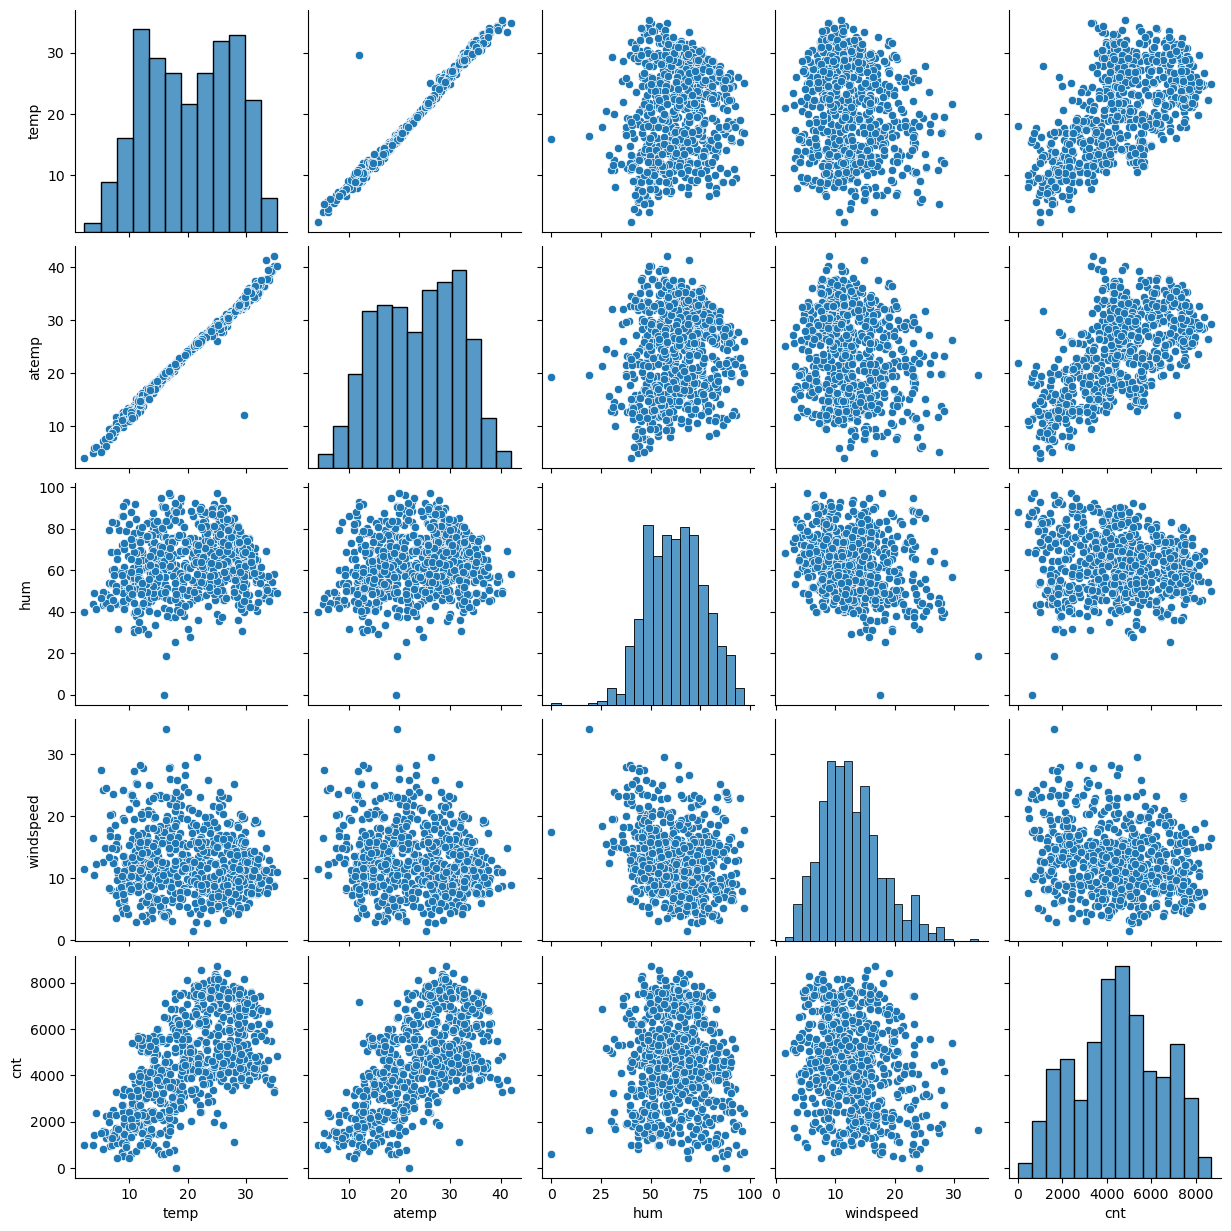

In [16]:
sns.pairplot(bike_sharing[['temp','atemp','hum','windspeed','cnt']])
plt.show()

<div class="alert alert-block alert-info">

**Insights:** 

1. The above Pair-Plot shows that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'

</div>

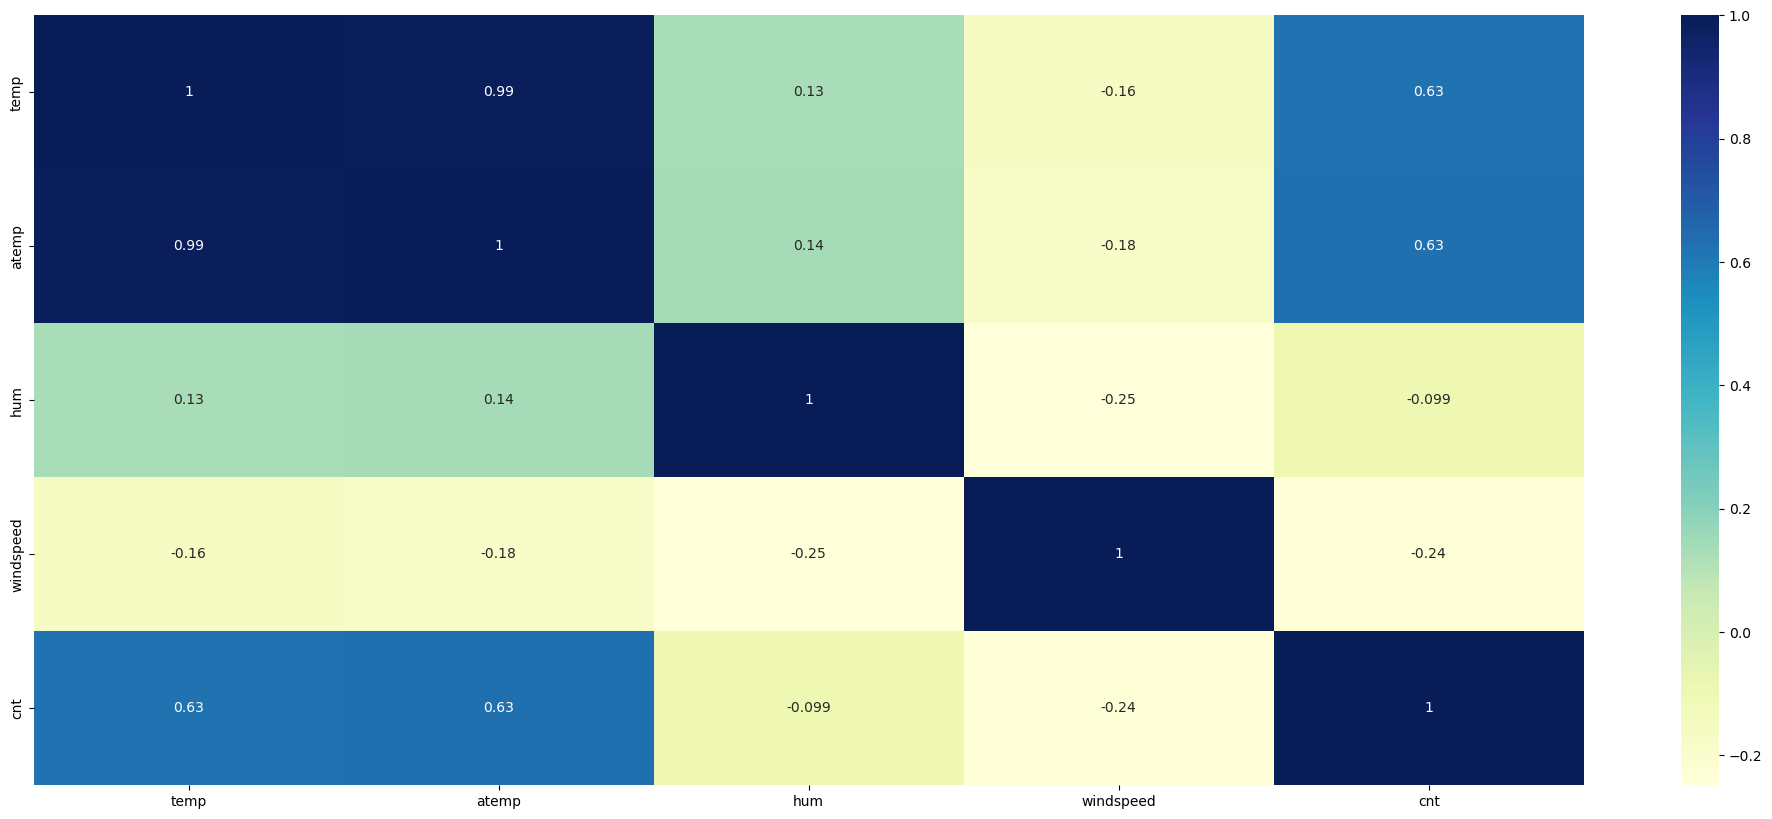

In [17]:
# Calculate Correlation
corr = bike_sharing[['temp','atemp','hum','windspeed','cnt']].corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

<div class="alert alert-block alert-info">

**Insights:** 

1. We see that temp and atemp has correlation more than 0.99 means almost 1 (highly correlated) which means atemp seems to be derived from temp.
2. We also see Target variable has a linear relationship with some of the indeptendent variables. Its a good sign for building a linear regression Model.

</div>

### 3.2: Visualising Categorial Variables

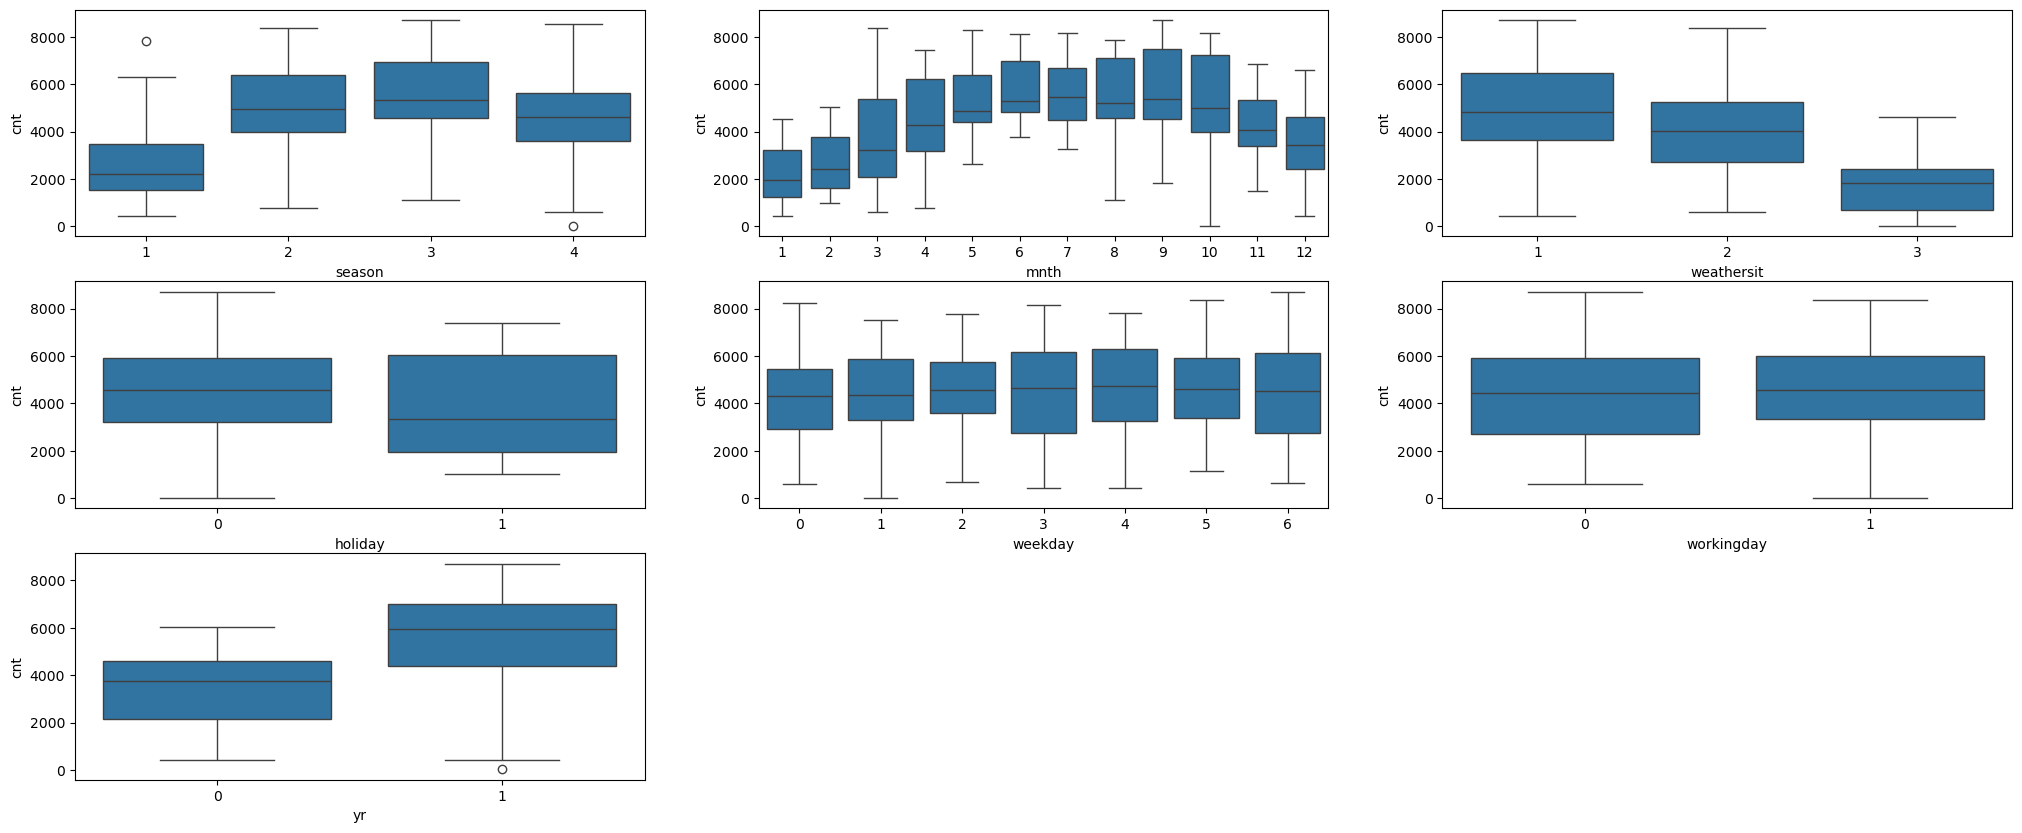

In [18]:
plt.figure(figsize=(25, 10))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.show()

<div class="alert alert-block alert-info">

**Insights:** 

1. September month has highest demand. Demand is continuously growing each month till June and after September demand is decreasing
2. highest demand for rental bikes is in season fall
3. Demand for next year has grown
4. When there is a holiday, demand has decreased.
5. Weekday is not giving clear picture abount demand.
6. The clear weathershit has highest demand

</div>

#### 3.3: Correlation Matrix

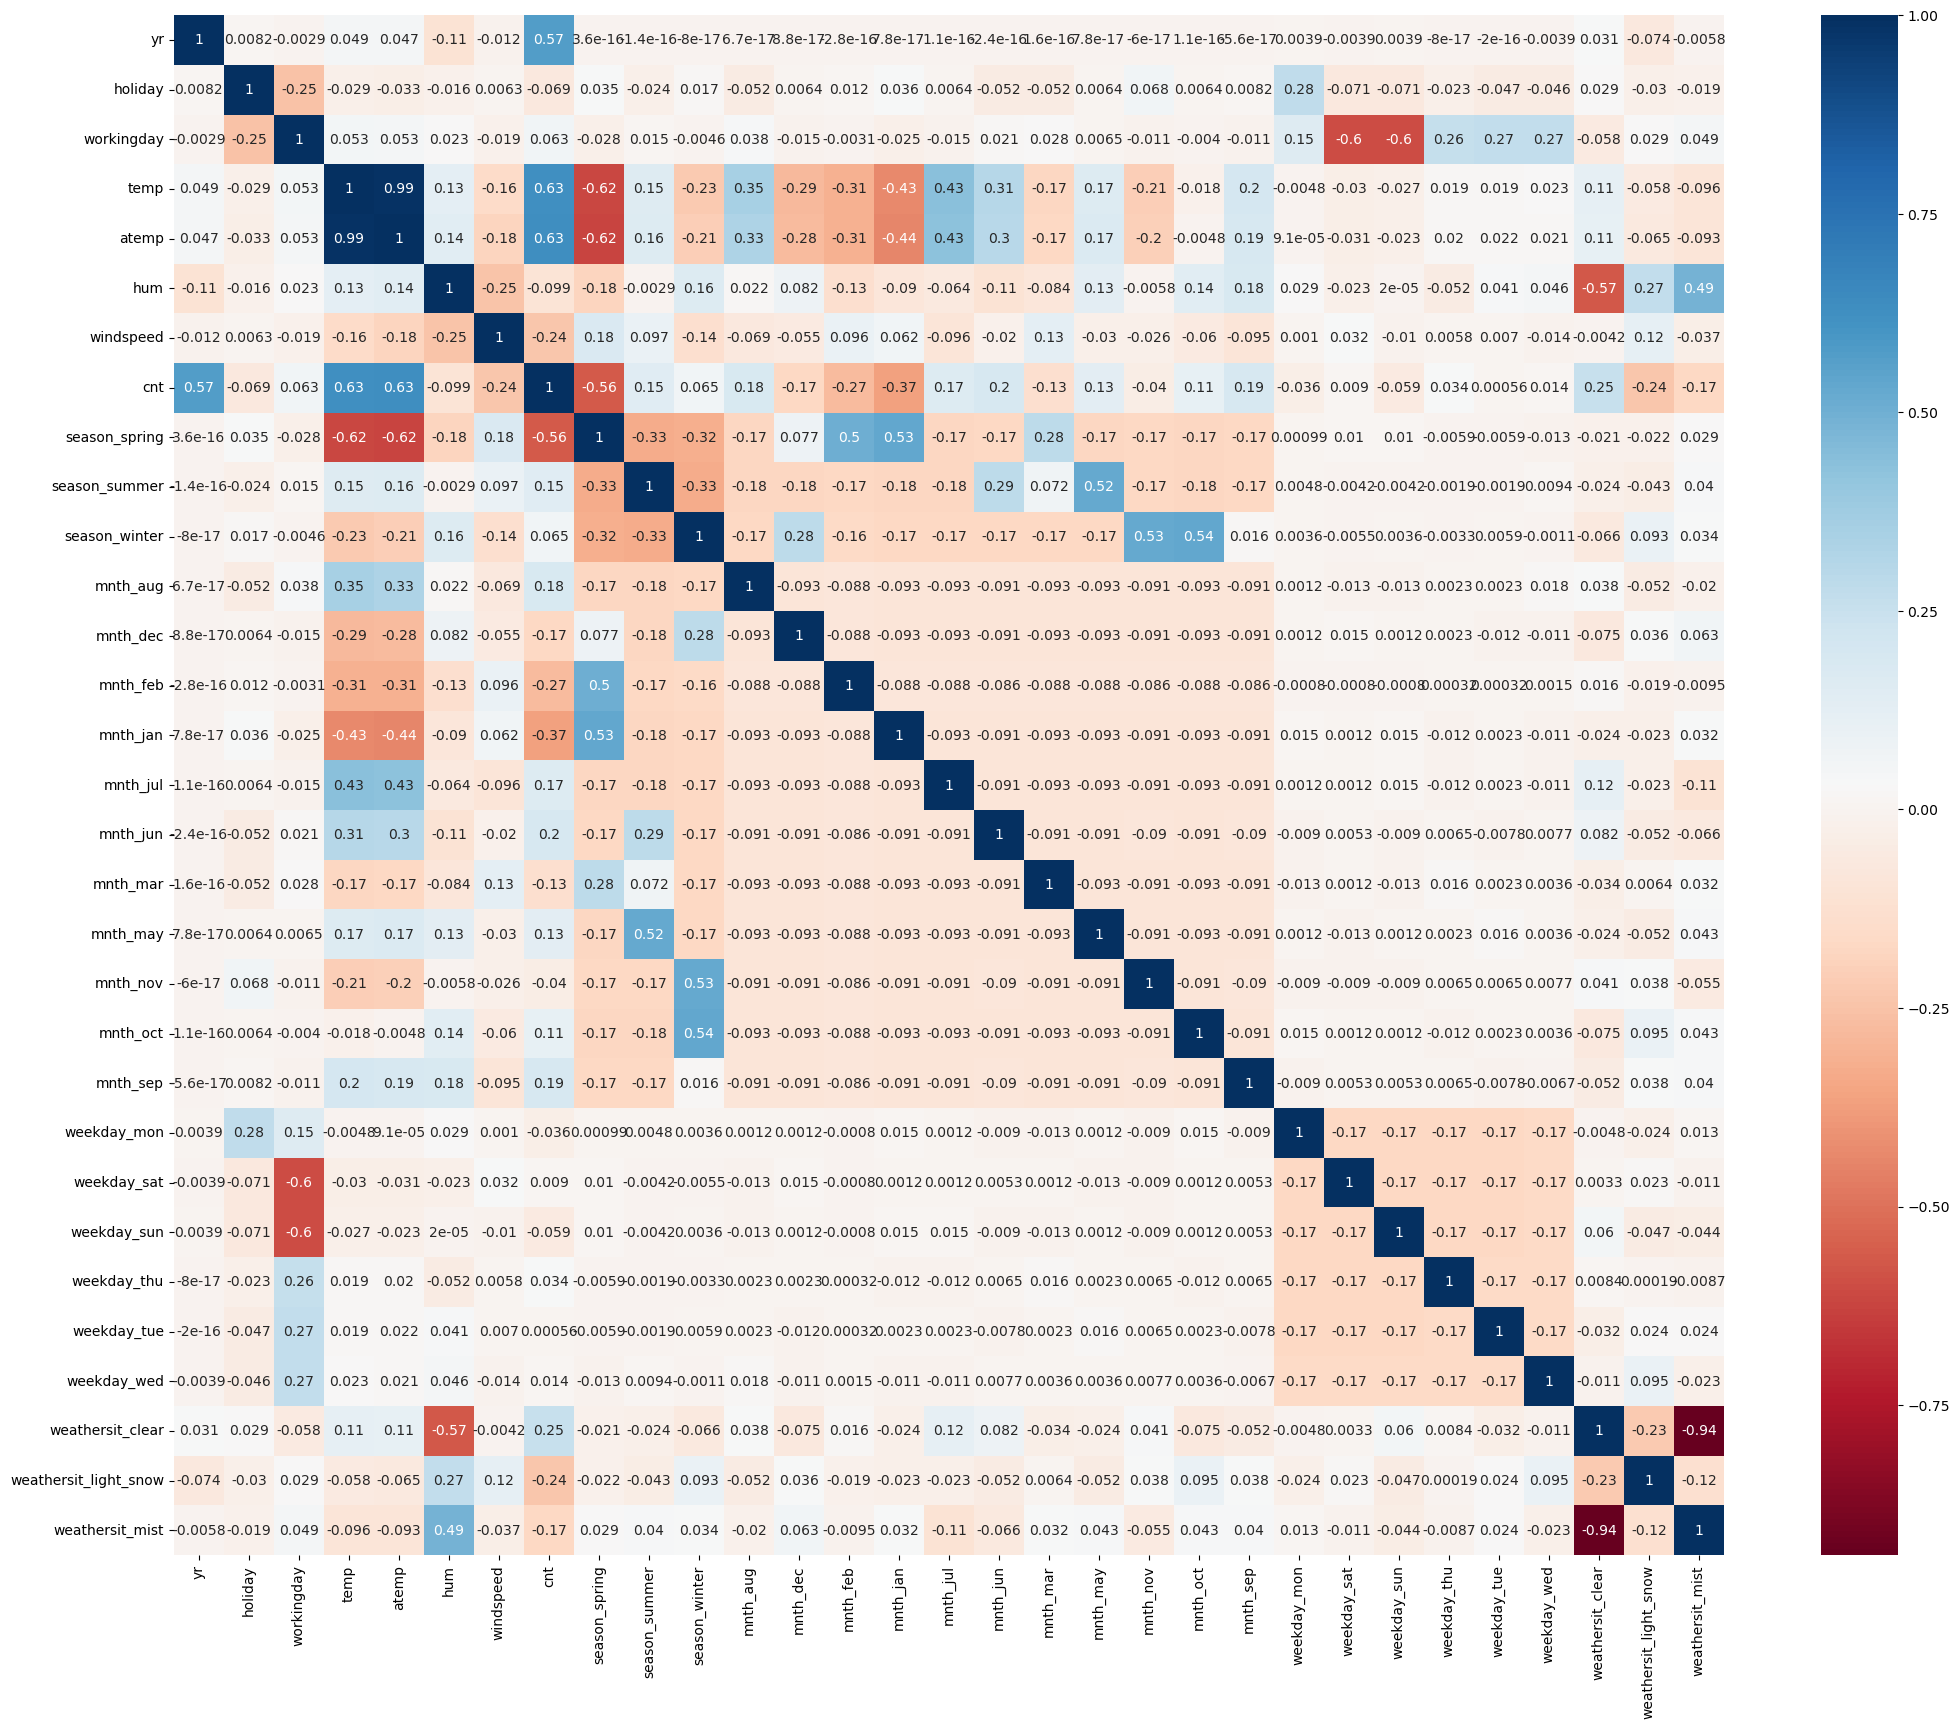

In [19]:
plt.figure(figsize = (25,20))
sns.heatmap(bike_sharing.corr(), annot = True, cmap="RdBu")
plt.show()


<div class="alert alert-block alert-info">

**Insights:** 

1. The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
2. This map will be usefull to identify the correct variable to select/eliminate from the model

</div>

## Step 4: Model Building

### 4.1: Split the data into train and test

In [20]:
bike_sharing.shape

(730, 31)

In [21]:
from sklearn.model_selection import train_test_split

bike_train, bike_test = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [22]:
bike_train.shape

(510, 31)

### 4.2: Rescaling the data

In [23]:
from sklearn.preprocessing import MinMaxScaler


In [24]:
scaler = MinMaxScaler()

num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()



,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_light_snow,weathersit_mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,1,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,1,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,1,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,1,0,0,0,0,0,0,1


In [25]:

bike_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_clear', 'weathersit_light_snow',
       'weathersit_mist'],
      dtype='object')

### 4.3: Automated Approach - Recursive Feature Elimination (RFE)

In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [27]:
# Dividing into X and Y sets for the model building
y_train = bike_train.pop('cnt')
X_train = bike_train

In [28]:
# Running RFE with the output bumber of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [29]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)),
 ('workingday', np.True_, np.int64(1)),
 ('temp', np.True_, np.int64(1)),
 ('atemp', np.True_, np.int64(1)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('season_spring', np.True_, np.int64(1)),
 ('season_summer', np.False_, np.int64(8)),
 ('season_winter', np.False_, np.int64(2)),
 ('mnth_aug', np.False_, np.int64(14)),
 ('mnth_dec', np.False_, np.int64(5)),
 ('mnth_feb', np.False_, np.int64(6)),
 ('mnth_jan', np.False_, np.int64(3)),
 ('mnth_jul', np.True_, np.int64(1)),
 ('mnth_jun', np.False_, np.int64(13)),
 ('mnth_mar', np.False_, np.int64(12)),
 ('mnth_may', np.False_, np.int64(7)),
 ('mnth_nov', np.False_, np.int64(4)),
 ('mnth_oct', np.False_, np.int64(15)),
 ('mnth_sep', np.True_, np.int64(1)),
 ('weekday_mon', np.False_, np.int64(9)),
 ('weekday_sat', np.True_, np.int64(1)),
 ('weekday_sun', np.True_, np.int64(1)),
 ('weekday_thu', np.False_, np.int64(11)),
 ('weekday_tue', np.F

In [30]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'mnth_jul', 'mnth_sep', 'weekday_sat', 'weekday_sun',
       'weathersit_clear', 'weathersit_light_snow', 'weathersit_mist'],
      dtype='object')

In [31]:
X_train.columns[~rfe.support_]

Index(['season_summer', 'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [32]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.shape

(510, 15)

### 4.4: Manual Elimination

In [33]:
import statsmodels.api as sm

In [34]:
# Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [35]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

#Function to calculate VIFs and print -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

### Model 1

In [36]:
# Start with all variables selected by RFE
col_rfe = X_train.columns[rfe.support_]
col_rfe

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'mnth_jul', 'mnth_sep', 'weekday_sat', 'weekday_sun',
       'weathersit_clear', 'weathersit_light_snow', 'weathersit_mist'],
      dtype='object')

In [37]:
# Build Model
build_model(col_rfe)
get_vif(col_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     195.9
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          8.76e-186
Time:                        22:02:10   Log-Likelihood:                 501.08
No. Observations:                 510   AIC:                            -974.2
Df Residuals:                     496   BIC:                            -914.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

<div class="alert alert-block alert-info">

**Insights:** 

1. Model Performance:
    - R-squared (0.837) and Adjusted R-squared (0.833): These values indicate that around 83.7% of the variation in the dependent variable (cnt, representing bike demand) is explained by the model, which is a good fit.
    - F-statistic (195.9) and p-value (8.76e-186): The model is statistically significant, meaning the independent variables collectively have a strong relationship with the dependent variable.
2. Significance of Variables:
    - Significant variables (p < 0.05) include yr, workingday, hum, windspeed, season_spring, mnth_jul, mnth_sep, weekday_sat, weathersit_clear, weathersit_light_snow, and weathersit_mist.
    - Non-significant variables (p > 0.05) include holiday, temp, and atemp. These may not be contributing effectively to the model and could be candidates for removal or further investigation.
3. Multicollinearity Issues:
    - The VIF table shows extremely high values (infinity) for variables like holiday, workingday, weekday_sat, weekday_sun, weathersit_clear, weathersit_light_snow, and weathersit_mist. High VIF values indicate multicollinearity, meaning that these variables are highly correlated with each other.
    - Multicollinearity can inflate the standard errors of the coefficients, leading to unreliable estimates. In such cases, it may be necessary to remove or combine some of the correlated variables.

</div>

<div class="alert alert-block alert-info">

**Action:** 

1. Remove the variable 'holiday' as it has high VIF value and high p-value

</div>

### Model 2

In [38]:
# drop 'holiday' from col_rfe
col_rfe = col_rfe.drop('holiday', 1)
col_rfe

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'mnth_jul', 'mnth_sep', 'weekday_sat', 'weekday_sun',
       'weathersit_clear', 'weathersit_light_snow', 'weathersit_mist'],
      dtype='object')

In [39]:
# Build Model
build_model(col_rfe)
get_vif(col_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     195.9
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          8.76e-186
Time:                        22:02:10   Log-Likelihood:                 501.08
No. Observations:                 510   AIC:                            -974.2
Df Residuals:                     496   BIC:                            -914.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.13

<div class="alert alert-block alert-info">

**Insights:** 

1. 'atemp' has high p-value and High VIF value. It is insignificant. 
2. Also it is highly correlated with 'temp'. Hence we can remove it.

</div>

### Model 3

In [40]:
# drop 'atemp' from col_rfe
col_rfe = col_rfe.drop('atemp', 1)
col_rfe

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'mnth_jul', 'mnth_sep', 'weekday_sat', 'weekday_sun',
       'weathersit_clear', 'weathersit_light_snow', 'weathersit_mist'],
      dtype='object')

In [41]:
# Build Model
build_model(col_rfe)
get_vif(col_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     211.9
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.27e-186
Time:                        22:02:10   Log-Likelihood:                 500.28
No. Observations:                 510   AIC:                            -974.6
Df Residuals:                     497   BIC:                            -919.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.13

<div class="alert alert-block alert-info">

**Insights:** 

1. 'weathersit_clear' has High VIF value. Will drop it and check with other variables.

</div>

### Model 4

In [42]:
# drop 'weathersit_clear' from col_rfe
col_rfe = col_rfe.drop('weathersit_clear', 1)
col_rfe

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'mnth_jul', 'mnth_sep', 'weekday_sat', 'weekday_sun',
       'weathersit_light_snow', 'weathersit_mist'],
      dtype='object')

In [43]:
# Build Model
build_model(col_rfe)
get_vif(col_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     211.9
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.27e-186
Time:                        22:02:10   Log-Likelihood:                 500.28
No. Observations:                 510   AIC:                            -974.6
Df Residuals:                     497   BIC:                            -919.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

<div class="alert alert-block alert-info">

**Insights:** 

1. 'hum' has High VIF value.
2. We can remove this variable as we have other factors also to consider the weather with high humidity. So in this case it will not be much relevant and can be removed.

</div>

### Model 5

In [44]:
# drop 'hum' from col_rfe
col_rfe = col_rfe.drop('hum', 1)
col_rfe

Index(['yr', 'workingday', 'temp', 'windspeed', 'season_spring', 'mnth_jul',
       'mnth_sep', 'weekday_sat', 'weekday_sun', 'weathersit_light_snow',
       'weathersit_mist'],
      dtype='object')

In [45]:
# Build Model
build_model(col_rfe)
get_vif(col_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.6
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          7.44e-186
Time:                        22:02:10   Log-Likelihood:                 495.64
No. Observations:                 510   AIC:                            -967.3
Df Residuals:                     498   BIC:                            -916.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

<div class="alert alert-block alert-info">

**Insights:** 

1. 'workingday' has High VIF value.
2. Even though the VIF of 'workingday' is second highest, we decided to drop 'workingday' and not 'temp' based on our common knowledge that temperature can be an important factor for a business like bike rentals. So and wanted to retain 'temp'.

</div>

### Model 6

In [46]:
# drop 'workingday' from col_rfe
col_rfe = col_rfe.drop('workingday', 1)
col_rfe

Index(['yr', 'temp', 'windspeed', 'season_spring', 'mnth_jul', 'mnth_sep',
       'weekday_sat', 'weekday_sun', 'weathersit_light_snow',
       'weathersit_mist'],
      dtype='object')

In [47]:
# Build Model
build_model(col_rfe)
get_vif(col_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     241.8
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          3.64e-184
Time:                        22:02:10   Log-Likelihood:                 488.80
No. Observations:                 510   AIC:                            -955.6
Df Residuals:                     499   BIC:                            -909.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

<div class="alert alert-block alert-info">

**Insights:** 

1. 'weekday_sat' has High p-value. Hence removing this variable.

</div>

### Model 7

In [48]:
# drop 'weekday_sat' from col_rfe
col_rfe = col_rfe.drop('weekday_sat', 1)
col_rfe

Index(['yr', 'temp', 'windspeed', 'season_spring', 'mnth_jul', 'mnth_sep',
       'weekday_sun', 'weathersit_light_snow', 'weathersit_mist'],
      dtype='object')

In [49]:
# Build Model
build_model(col_rfe)
get_vif(col_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     268.0
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          5.61e-185
Time:                        22:02:10   Log-Likelihood:                 487.82
No. Observations:                 510   AIC:                            -955.6
Df Residuals:                     500   BIC:                            -913.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31

<div class="alert alert-block alert-info">

**Insights:** 

1. This model's VIF seems to be almost accepted, p-value for all the features is almost 0.0 and R2 is 0.828
2. This model looks good, as there seems to be very low Multicollinearity between the predictors and the p-values for all the predictors seems to be significant.
3. Let us select this model as our final model as it has all important statistics high (R-square, Adjusted R-squared and F-statistic)

</div>

## Step 5: Model Interpretation

### 5.1: Hypothesis Testing

Hypothesis testing states that:
- H0:B1=B2=...=Bn=0 
- H1:  at least one  Bi!=0

#### Final Model coefficient values

- const : 0.3127
- yr : 0.2356
- temp : 0.3904
- season_spring : -0.1469
- windspeed : -0.1528
- mnth_jul : -0.0706 
- mnth_sep : 0.0516 
- weekday_sun : -0.0428 
- weathersit_light_snow : -0.2789
- weathersit_mist : -0.0820 

<div class="alert alert-block alert-info">

**Insights:** 

1. It is evident that all our coefficients are not equal to zero, which means **We can REJECT the NULL HYPOTHESIS**

</div>

### 5.2: F-Statistics

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic: 268.0
- Prob (F-statistic): 5.61e-185

The F-Statistics value of 268 (which is greater than 1) and the p-value extremely small, states that the overall model is significant

<div class="alert alert-block alert-info">

**Insights:** 

1. The F-Statistics value of 268 (which is greater than 1) and the p-value extremely small(~0.000), states that the overall model is significant

</div>

### 5.3: Equation of best fitted model

<div class="alert alert-block alert-info">

**Equation:** 

**cnt** = 0.3127+ (**yr** × 0.2356) + (**temp** × 0.3904) + (**mnth_sep** × 0.0516 ) - (**windspeed** × 0.1528) − (**season_spring** × 0.1469) - (**mnth_jul** × -0.0706 )  - (**weekday_sun** × 0.0428 ) - (**weathersit_light_snow** × 0.2789) − (**weathersit_mist** × 0.0820 )

</div>



## Step 6: Model Evaluation

### 6.1: Residual Analysis

In [50]:
# Fit the model
lr = LinearRegression()
lr.fit(X_train[col_rfe],y_train)

LinearRegression()

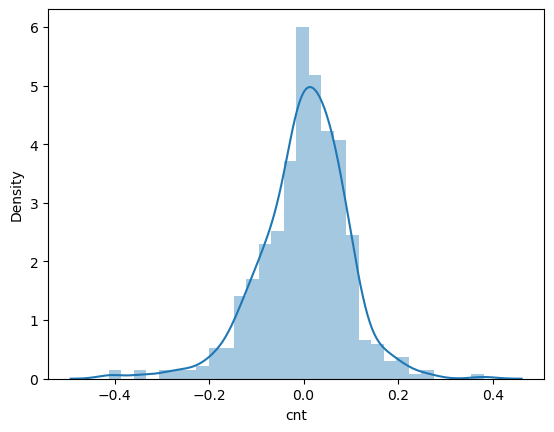

In [51]:
y_train_pred = lr.predict(X_train[col_rfe])
res = y_train - y_train_pred
sns.distplot(res)
plt.show()


<div class="alert alert-block alert-info">

**Insights:** 

 - Errors are normally distribured here with mean 0. So everything seems to be fine

</div>

### 6.2: Linearity Check

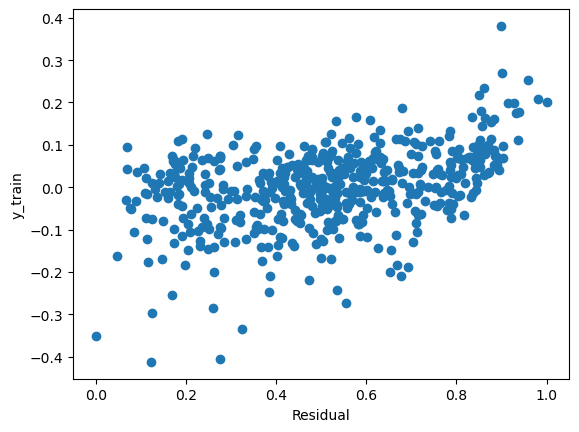

In [52]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### 6.3: Multicollinearity Check

In [53]:
get_vif(col_rfe)

                Features   VIF
1                   temp  4.67
2              windspeed  3.83
0                     yr  2.03
3          season_spring  1.52
8        weathersit_mist  1.48
4               mnth_jul  1.33
5               mnth_sep  1.20
6            weekday_sun  1.16
7  weathersit_light_snow  1.06


<div class="alert alert-block alert-info">

**Insights:** 

- From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

</div>

### 6.4: Predictions and Evaluation on the Test Set


In [54]:
# Apply scaler() to all numeric variables in test dataset
num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [55]:
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_light_snow,weathersit_mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,1,0,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,1,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,1,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,1,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,1,0,0,1,0,0


In [56]:
# Dividing into X_test and y_test
y_test = bike_test.pop('cnt')
X_test = bike_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     219 non-null    int64  
 1   holiday                219 non-null    int64  
 2   workingday             219 non-null    int64  
 3   temp                   219 non-null    float64
 4   atemp                  219 non-null    float64
 5   hum                    219 non-null    float64
 6   windspeed              219 non-null    float64
 7   season_spring          219 non-null    int64  
 8   season_summer          219 non-null    int64  
 9   season_winter          219 non-null    int64  
 10  mnth_aug               219 non-null    int64  
 11  mnth_dec               219 non-null    int64  
 12  mnth_feb               219 non-null    int64  
 13  mnth_jan               219 non-null    int64  
 14  mnth_jul               219 non-null    int64  
 15  mnth_jun  

In [57]:
# Selecting the variables that were part of final model.
X_test=X_test[col_rfe]

In [58]:
y_test_pred = lr.predict(X_test)

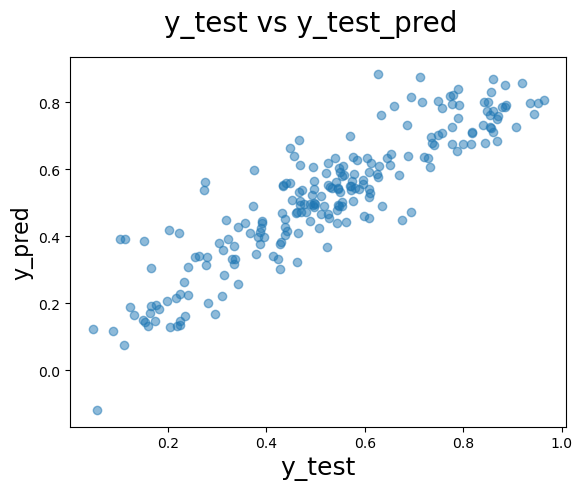

In [59]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

<div class="alert alert-block alert-info">

**Insight:** 

1. We can see that variance of the residuals (error terms) is constant across predictions. Means error term does not vary much as the value of the predictor variable changes.

</div>

### 6.4: R-Squared value on Test Set

In [60]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8052355089361372

<div class="alert alert-block alert-info">

**Insight:** 

1. R2 value for predictions on test data is 0.805 which is almost same as R2 value of train data 0.828. This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

</div>

## Final Report


### Analysis on Bike Sharing Data

**Model Summary**:
- **R-squared**: 0.837
- **F-statistic**: 268.0
- **Prob (F-statistic)**: 5.61e-185

**Significant Variables**:
- `yr`: Indicates a significant positive effect on bike demand.
- `temp`, `season_spring`, and `mnth_sep`: These variables are highly significant in predicting bike demand.
- `hum` and `windspeed`: Both have a negative impact on bike demand and are statistically significant.

**Multicollinearity**:
- Variables like `temp` and `atemp` show high VIF values, indicating multicollinearity. Therefore, one of these variables can be dropped to improve the model's stability.
- Similarly, categories like `holiday`, `workingday`, and specific `weathersit` categories showed multicollinearity issues.

**Model Improvements**:
- Multicollinearity was addressed by removing highly correlated variables.
- Regularization techniques like Ridge and Lasso can be further explored to improve the model’s performance and handle collinear predictors.

**Conclusions**:
- The final linear regression model explains 83.7% of the variance in bike-sharing demand.
- The model is statistically significant and provides useful insights into the factors driving bike usage.
- Further improvements can be made by refining feature selection, addressing multicollinearity, and exploring non-linear relationships.

**Recommendations**:
- For business decisions, focus on factors like working days, seasons, and weather conditions to anticipate demand effectively.
- Future analysis can incorporate real-time data and more sophisticated models like decision trees or ensemble methods to capture complex patterns in bike-sharing demand.


